In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import rasterio
from shapely.geometry import box
import pyproj
from shapely.ops import transform
import geopandas as gpd

In [3]:
fp = '/oak/stanford/groups/deho/building_compliance/los_angeles_naip/2016_rgb_footprint_512'

In [5]:
im = np.load(os.path.join(fp, 'images', 'm_3311806_nw_11_h_20160710_229.npy'))

In [7]:
mask = np.load(os.path.join(fp, 'mask', 'm_3311806_nw_11_h_20160710_229.npy'))

In [8]:
mask.shape

(512, 512)

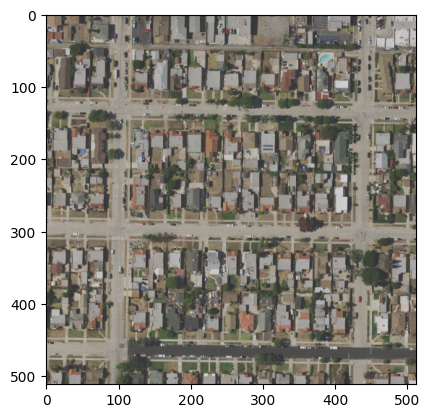

In [9]:
plt.imshow(im[:, :, :3])
plt.show()

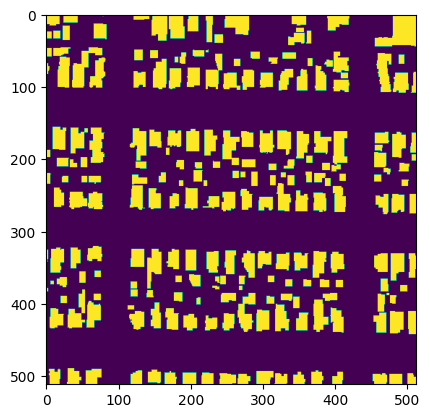

In [10]:
plt.imshow(mask)
plt.show()

In [2]:
fp = '/oak/stanford/groups/deho/building_compliance/san_jose_naip_512/'
print(len(os.listdir(os.path.join(fp, 'train', 'masks_wt'))))
print(len(os.listdir(os.path.join(fp, 'train', 'masks'))))
print(len(os.listdir(os.path.join(fp, 'train', 'images'))))

3678
3678
3678


In [ ]:
for i in os.listdir(os.path.join(fp, 'train', 'images'))[2952:2956]:
    im = np.load(os.path.join(fp, 'train', 'images', i))
    mask = np.load(os.path.join(fp, 'train', 'masks', i.replace('.npy', '_mask.npy')))
    mask_wt = np.load(os.path.join(fp, 'train', 'masks_wt', i.replace('.npy', '_mask_wt.npy')))
    plt.imshow(im[:, :, :3])
    plt.show()
    
    plt.imshow(mask)
    plt.show()
    
    plt.imshow(mask_wt)
    plt.show()

In [17]:
test = os.listdir(os.path.join(fp, 'train', 'masks'))[:786]

In [18]:
for i in os.listdir(os.path.join(fp, 'train', 'masks_wt')):
    if not i.replace('mask_wt.npy', 'mask.npy') in test:
        print(i)

# Filter which TIFs contain buildings not covered in our dataset

In [2]:
sj_limits = gpd.read_file('../../all_buildings/scripts/san_jose/City_Limits')

In [3]:
sj_limits = sj_limits.to_crs('epsg:4326')

In [4]:
sj_geom = sj_limits['geometry'].values[0]

In [ ]:
fp = '/oak/stanford/groups/deho/building_compliance/san_jose_naip_512/'
count = 0
for i in os.listdir(os.path.join(fp, 'test', 'images')):
    with rasterio.open(os.path.join(fp, 'raw_tif', i.replace('.npy', '.tif'))) as src:  # open raster dataset
        pic = src.read()
        bounds = src.bounds
        geom = box(*bounds)
        wgs84 = pyproj.CRS('EPSG:26910')
        utm = pyproj.CRS('EPSG:4326')

        project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
        utm_point = transform(project, geom)
        
        iou = utm_point.intersection(sj_geom).area/utm_point.area
        if iou < 1:
            print(i)
            im = np.load(os.path.join(fp, 'test', 'images', i))
            mask = np.load(os.path.join(fp, 'test', 'masks', i.replace('.npy', '_mask.npy')))
            plot_sample(im[:, :, :3], mask)
#             plt.imshow(im[:, :, :3])
#             plt.show()

#             plt.imshow(mask)
#             plt.show()
            count += 1

In [6]:
def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
#     titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})']

    for i, img in enumerate(images):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
#         plt.title(title)
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

# Move out TIFs without full building footprints

In [47]:
# open incomplete tif data
with open('data/san_jose/sj_incomplete_tifs_val.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

In [48]:
missing_footprint = [i + '.npy' for i in lines]

In [41]:
fp = '/oak/stanford/groups/deho/building_compliance/san_jose_naip_512/'

In [42]:
if not os.path.exists(os.path.join(fp, 'incomplete_footprints')):
    os.mkdir(os.path.join(fp, 'incomplete_footprints'))
    for i in ['train', 'test', 'val']:
        os.mkdir(os.path.join(fp, 'incomplete_footprints', i))
        os.mkdir(os.path.join(fp, 'incomplete_footprints', i, 'masks'))
        os.mkdir(os.path.join(fp, 'incomplete_footprints', i, 'masks_wt'))
        os.mkdir(os.path.join(fp, 'incomplete_footprints', i, 'images'))

In [23]:
import shutil

In [43]:
os.listdir(os.path.join(fp, 'train', 'images'))

['m_3712142_nw_10_060_20200525_44.npy',
 'm_3712142_nw_10_060_20200525_405.npy',
 'm_3712142_nw_10_060_20200525_233.npy',
 'm_3712134_sw_10_060_20200525_411.npy',
 'm_3712142_se_10_060_20200525_315.npy',
 'm_3712134_sw_10_060_20200525_307.npy',
 'm_3712150_ne_10_060_20200525_165.npy',
 'm_3712141_se_10_060_20200525_325.npy',
 'm_3712142_nw_10_060_20200525_207.npy',
 'm_3712142_ne_10_060_20200525_183.npy',
 'm_3712150_ne_10_060_20200525_74.npy',
 'm_3712142_ne_10_060_20200525_392.npy',
 'm_3712142_se_10_060_20200525_82.npy',
 'm_3712141_se_10_060_20200525_126.npy',
 'm_3712142_sw_10_060_20200525_189.npy',
 'm_3712141_se_10_060_20200525_120.npy',
 'm_3712142_sw_10_060_20200525_410.npy',
 'm_3712149_ne_10_060_20200525_233.npy',
 'm_3712141_sw_10_060_20200525_81.npy',
 'm_3712142_ne_10_060_20200525_63.npy',
 'm_3712142_se_10_060_20200525_168.npy',
 'm_3712150_nw_10_060_20200525_326.npy',
 'm_3712142_sw_10_060_20200525_201.npy',
 'm_3712142_se_10_060_20200525_226.npy',
 'm_3712141_se_10_060

In [49]:
for i in missing_footprint:
    shutil.move(os.path.join(fp, 'val', 'images', i), 
                        os.path.join(fp, 'incomplete_footprints', 'val', 'images'))
    shutil.move(os.path.join(fp, 'val', 'masks', i.replace(".npy", "_mask.npy")), 
                        os.path.join(fp, 'incomplete_footprints', 'val', 'masks'))
    shutil.move(os.path.join(fp, 'val', 'masks_wt', i.replace(".npy", "_mask_wt.npy")), 
                        os.path.join(fp, 'incomplete_footprints', 'val', 'masks_wt'))

Investigate why combined training has the NaN problem

In [2]:
root_dir = '/oak/stanford/groups/deho/building_compliance/'
data_type = 'train'

In [19]:
sj = list(sorted(os.listdir(os.path.join(root_dir, 'san_jose_naip_512', data_type, 'images'))))
la = list(sorted(os.listdir(os.path.join(root_dir, 'los_angeles_naip/2016_rgb_footprint_512', data_type, 'images'))))
inputs = la+sj

In [20]:
la

['m_3311806_ne_11_h_20160707_0.npy',
 'm_3311806_ne_11_h_20160707_1.npy',
 'm_3311806_ne_11_h_20160707_10.npy',
 'm_3311806_ne_11_h_20160707_100.npy',
 'm_3311806_ne_11_h_20160707_101.npy',
 'm_3311806_ne_11_h_20160707_102.npy',
 'm_3311806_ne_11_h_20160707_105.npy',
 'm_3311806_ne_11_h_20160707_107.npy',
 'm_3311806_ne_11_h_20160707_11.npy',
 'm_3311806_ne_11_h_20160707_111.npy',
 'm_3311806_ne_11_h_20160707_113.npy',
 'm_3311806_ne_11_h_20160707_114.npy',
 'm_3311806_ne_11_h_20160707_115.npy',
 'm_3311806_ne_11_h_20160707_117.npy',
 'm_3311806_ne_11_h_20160707_118.npy',
 'm_3311806_ne_11_h_20160707_119.npy',
 'm_3311806_ne_11_h_20160707_12.npy',
 'm_3311806_ne_11_h_20160707_120.npy',
 'm_3311806_ne_11_h_20160707_121.npy',
 'm_3311806_ne_11_h_20160707_123.npy',
 'm_3311806_ne_11_h_20160707_126.npy',
 'm_3311806_ne_11_h_20160707_127.npy',
 'm_3311806_ne_11_h_20160707_128.npy',
 'm_3311806_ne_11_h_20160707_13.npy',
 'm_3311806_ne_11_h_20160707_130.npy',
 'm_3311806_ne_11_h_20160707_131.

In [3]:
import json

with open('../run/combined_naip/combined_naip_0.1_True_0.001_0.0001_crowdAI/metrics.jsonl') as f:
    count = 0
    for line in f:
        l = json.loads(line)
        if np.isnan(l['train_loss']):
            break
        count += 1

In [4]:
count

3818

In [22]:
count

1077

In [48]:
count

285

In [32]:
count

285

In [56]:
count += 1

In [24]:
la[count*4:(count+1)*4]

['m_3411862_sw_11_h_20160710_32.npy',
 'm_3411862_sw_11_h_20160710_33.npy',
 'm_3411862_sw_11_h_20160710_34.npy',
 'm_3411862_sw_11_h_20160710_35.npy']

In [27]:
import shutil

In [28]:
missing_footprint = ['m_3411862_sw_11_h_20160710_34.npy',
 'm_3411862_sw_11_h_20160710_35.npy']

In [29]:
fp = '/oak/stanford/groups/deho/building_compliance/los_angeles_naip/2016_rgb_footprint_512/'

In [30]:
if not os.path.exists(os.path.join(fp, 'temp')):
    os.mkdir(os.path.join(fp, 'temp'))
    os.mkdir(os.path.join(fp, 'temp', 'train'))
    os.mkdir(os.path.join(fp, 'temp', 'train', 'images'))
    os.mkdir(os.path.join(fp, 'temp', 'train', 'masks'))
    os.mkdir(os.path.join(fp, 'temp', 'train', 'masks_wt'))

In [31]:
# move
fp = '/oak/stanford/groups/deho/building_compliance/los_angeles_naip/2016_rgb_footprint_512/'

for i in missing_footprint:
    shutil.move(os.path.join(fp, 'train', 'images', i), 
                        os.path.join(fp, 'temp', 'train', 'images'))
    shutil.move(os.path.join(fp, 'train', 'masks', i.replace(".npy", "_mask.npy")), 
                        os.path.join(fp, 'temp', 'train', 'masks'))
    shutil.move(os.path.join(fp, 'train', 'masks_wt', i.replace(".npy", "_mask_wt.npy")), 
                        os.path.join(fp, 'temp', 'train', 'masks_wt'))

In [18]:
# reverse
fp = '/oak/stanford/groups/deho/building_compliance/los_angeles_naip/2016_rgb_footprint_512/'
missing_footprint = ['m_3411853_ne_11_h_20160711_183.npy',
 'm_3411853_ne_11_h_20160711_184.npy',
                    'm_3311814_nw_11_h_20160710_105.npy',
 'm_3311814_nw_11_h_20160710_106.npy',
 'm_3311814_nw_11_h_20160710_107.npy',
 'm_3311814_nw_11_h_20160710_108.npy']

for i in missing_footprint:
    shutil.move(os.path.join(fp, 'temp', 'train', 'images', i), 
                        os.path.join(fp, 'train', 'images'))
    shutil.move(os.path.join(fp, 'temp', 'train', 'masks', i.replace(".npy", "_mask.npy")), 
                        os.path.join(fp, 'train', 'masks'))
    shutil.move(os.path.join(fp, 'temp', 'train', 'masks_wt', i.replace(".npy", "_mask_wt.npy")), 
                        os.path.join(fp, 'train', 'masks_wt'))

In [11]:
fp = '/oak/stanford/groups/deho/building_compliance/los_angeles_naip/2016_rgb_footprint_512/'

In [12]:
for i in ['train', 'test', 'val']:
    for j in os.listdir(os.path.join(fp, i, 'images')):
        if not os.path.exists(os.path.join(fp, i, 'masks_wt', j.replace('.npy', '_mask_wt.npy'))):
            print(j)

In [8]:
for i in ['test', 'val']:
    for j in os.listdir(os.path.join(fp, i, 'images')):
        if not os.path.exists(os.path.join(fp, i, 'masks_wt2', j.replace('.npy', '_mask_wt.npy'))):
            if not os.path.exists(os.path.join(fp, 'temp', i, 'masks_wt', j.replace('.npy', '_mask_wt.npy'))):
                print(j)

In [9]:
for i in ['test', 'val']:
    if os.path.exists(os.path.join(fp, i, 'masks_wt2')):
        print(i)

test
val


In [13]:
i = ['crowdAI', 'urban3D']
test = 'eeee_crowdAI'
if test in i:
    print('yes')